# Virus × EVE's classification

___Inference___

### Initialization

Imports

In [318]:
import pandas as pd

Parameters

In [298]:
path_root = '/home/small_rna_metavir/src'
# path_runs = f'{path_root}/virus-eves/runs'

## Build Model _(Random Forest Classifier)_

Import data

In [186]:
path_ds_eves = f'{path_root}/ds/virus-eves/ds_virus-eves.tab'

In [187]:
df_eves = pd.read_table(path_ds_eves, index_col='V1')

### Separate: X _(features)_ × Y _(classes)_

In [188]:
col_class_eve = 'class'
x_range_eve = list(range(4, 52))

In [189]:
X_eves = df_eves.iloc[:, x_range_eve]
y_eves = df_eves[col_class_eve]
n_samples, n_features = X_eves.shape

print(f"n_samples: {n_samples} × n_features: {n_features}")
print(f'y.shape ({col_class_eve}): {y_eves.shape}')
print(f'X.shape: {X_eves.shape}')


n_samples: 2315 × n_features: 48
y.shape (class): (2315,)
X.shape: (2315, 48)


In [190]:
feat_eves = X_eves.columns
feat_eves

Index(['X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24',
       'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34',
       'X35', 'X.15', 'X.16', 'X.17', 'X.18', 'X.19', 'X.20', 'X.21', 'X.22',
       'X.23', 'X.24', 'X.25', 'X.26', 'X.27', 'X.28', 'X.29', 'X.30', 'X.31',
       'X.32', 'X.33', 'X.34', 'X.35', 'dens15to18', 'dens20to22',
       'dens25to29', 'ratiosi_pi', 'ratio_si', 'dens18to35'],
      dtype='object')

**Class names**

_Classes are clearly unbalanced. It will be necessary to handle this when splitting test × training data..._

In [191]:
classes = list(y_eves.unique())
class_counts = list(y_eves.value_counts())
y_eves.value_counts()

viral    1321
eve       994
Name: class, dtype: int64

### Train

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Split training × testing data

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X_eves, y_eves, test_size=0.3, random_state=13, stratify=y_eves)

print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}')

X_train.shape: (1620, 48), y_train.shape: (1620,)
X_test.shape: (695, 48), y_test.shape: (695,)


Train

In [194]:
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

Check test classification accuracy

In [195]:
y_hat = classifier.predict(X_test)
accuracy = (y_hat == y_test).sum() / y_test.shape[0]
print(f'accuracy: {100 * accuracy}')

accuracy: 92.08633093525181


## Parse Dark Matter Data

Import Data

In [264]:
path_ds_libs = [
    ('RKPM44_01', f'{path_root}/ds/virus-dark-matter/ds_virus-dark-matter-RKPM44.tab'),
    ('RNPM221_01', f'{path_root}/ds/virus-dark-matter/ds_virus-dark-matter-RNPM221_01.tab'),
]

In [305]:
# lib_id, lib_path = path_ds_libs[0]
lib_id, lib_path = path_ds_libs[1]
df_dark = pd.read_table(lib_path)

In [317]:
print(f'Parsing {lib_id} lib ({lib_path})')

Parsing RNPM221_01 lib (/home/small_rna_metavir/src/ds/virus-dark-matter/ds_virus-dark-matter-RNPM221_01.tab)


### EDA

In [269]:
df_dark.head()

,Contigs_ID,Similarity_label,15,16,17,18,19,20,21,22,...,-33,-34,-35,dens15to18,dens20to22,dens25to29,ratiosi_pi,ratio_si,dens18to35,length
0,bN_RKPM44_Contig11_10,viral,-0.458080,-0.458080,-0.458080,-0.451239,-0.423021,-0.303308,2.654454,0.147325,...,-0.443543,-0.434992,-0.417890,-7.790348,2.105795,2.058274,0.047520,0.549719,3.817560,1771
1,bN_RKPM44_Contig12_11,viral,-0.338402,-0.338402,-0.338402,-0.338402,-0.305252,-0.156079,4.761109,0.258290,...,-0.321827,-0.327352,-0.327352,-16.609640,2.051209,-0.388975,2.440184,0.008159,2.500344,512
2,bN_RKPM44_Contig195_194,viral,-0.285242,-0.285242,-0.285242,-0.285242,-0.260587,0.027052,5.467541,0.290036,...,-0.285242,-0.285242,-0.285242,-16.609640,2.159199,-1.889817,4.049016,0.431799,2.380272,315
3,bN_RKPM44_Contig1_0,viral,-0.402533,-0.402533,-0.402533,-0.402533,-0.371450,-0.196612,5.386557,0.553250,...,-0.379221,-0.336483,-0.355909,-16.609640,2.379971,0.741514,1.638457,0.602814,3.072798,570
4,bN_RKPM44_Contig2332_2331,viral,-0.353041,-0.353041,-0.353041,-0.352393,-0.345198,-0.314995,0.096574,-0.209996,...,-0.349994,-0.351031,-0.351226,-7.527122,2.823717,6.633881,-3.810164,1.070330,7.003396,2029


In [270]:
df_dark.shape

(72, 51)

In [271]:
df_dark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contigs_ID        72 non-null     object 
 1   Similarity_label  72 non-null     object 
 2   15                72 non-null     float64
 3   16                72 non-null     float64
 4   17                72 non-null     float64
 5   18                72 non-null     float64
 6   19                72 non-null     float64
 7   20                72 non-null     float64
 8   21                72 non-null     float64
 9   22                72 non-null     float64
 10  23                72 non-null     float64
 11  24                72 non-null     float64
 12  25                72 non-null     float64
 13  26                72 non-null     float64
 14  27                72 non-null     float64
 15  28                72 non-null     float64
 16  29                72 non-null     float64
 17 

In [272]:
df_dark.describe()

,15,16,17,18,19,20,21,22,23,24,...,-33,-34,-35,dens15to18,dens20to22,dens25to29,ratiosi_pi,ratio_si,dens18to35,length
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,-0.380758,-0.380758,-0.380758,-0.379869,-0.350210,-0.249042,1.461769,0.123824,-0.085625,0.261538,...,-0.342098,-0.361077,-0.359322,-14.981120,-4.133973,0.161679,-4.453770,-7.500839,1.618507,615.236111
std,0.127813,0.127813,0.127813,0.127231,0.167589,0.216889,2.417163,0.845163,0.471451,1.451832,...,0.160269,0.107621,0.134362,3.562260,6.523590,2.820989,6.399003,8.988610,2.678596,1029.998284
min,-0.883554,-0.883554,-0.883554,-0.882372,-0.816644,-0.591130,-0.591130,-0.591130,-0.591130,-0.477807,...,-0.665553,-0.666372,-0.743008,-16.609640,-16.609640,-8.005625,-16.609640,-16.609640,-4.420662,200.000000
25%,-0.428802,-0.428802,-0.428802,-0.428298,-0.411566,-0.377281,-0.320688,-0.297619,-0.300823,-0.250952,...,-0.416999,-0.419728,-0.419861,-16.609640,-6.417650,-1.136513,-7.128736,-16.609640,-0.065270,226.500000
50%,-0.356504,-0.356504,-0.356504,-0.356504,-0.343221,-0.289270,-0.235876,-0.206366,-0.204421,-0.163681,...,-0.346519,-0.347544,-0.350534,-16.609640,-5.093929,-0.219278,-4.960028,0.000000,1.025323,260.000000
75%,-0.286629,-0.286629,-0.286629,-0.286629,-0.277424,-0.181728,3.667233,0.237738,-0.020887,-0.000169,...,-0.273494,-0.284656,-0.284656,-16.609640,2.064855,0.834714,0.366073,0.587543,3.269305,434.000000
max,-0.179646,-0.179646,-0.179646,-0.179646,0.613707,0.597666,6.745262,4.122626,2.376995,6.535886,...,0.530289,-0.152393,0.264124,-2.958421,6.426056,8.269759,6.158616,6.594947,8.895236,6811.000000


Check for missing values

In [273]:
df_dark.isnull().sum().sum() # Whole data frame
# df_virus_dark_matter.isna().sum().sort_values(ascending=False)[2:] # By columns

0

### Separate: X _(features)_ × Y _(classes)_ ×  ID's _(contig ID's)_

In [306]:
col_class_dark = 'Similarity_label'
col_id_dark = 'Contigs_ID'
x_range_dark = list(range(2, 51))

In [307]:
ids = df_dark[col_id_dark] # Contig ID's
X_dark = df_dark.iloc[:, x_range_dark] # Feature Values
y_dark = df_dark[col_class_dark] # Labels
n_samples, n_features = X_dark.shape

print(f"n_samples: {n_samples} × n_features: {n_features}")
print(f"ID's -> ids.shape {ids.shape} ({ids.unique().shape[0]} are unique)")
print(f'y.shape ({col_class_dark}): {y_dark.shape}')
print(f'X.shape: {X_dark.shape}')

n_samples: 379 × n_features: 49
ID's -> ids.shape (379,) (379 are unique)
y.shape (Similarity_label): (379,)
X.shape: (379, 49)


In [308]:
feat_dark = X_dark.columns
feat_dark

Index(['15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31', '32', '33', '34', '35', '-15', '-16',
       '-17', '-18', '-19', '-20', '-21', '-22', '-23', '-24', '-25', '-26',
       '-27', '-28', '-29', '-30', '-31', '-32', '-33', '-34', '-35',
       'dens15to18', 'dens20to22', 'dens25to29', 'ratiosi_pi', 'ratio_si',
       'dens18to35', 'length'],
      dtype='object')

Check if all features data is numeric

_Yes, they are..._

In [309]:
set(X_dark.dtypes)

{dtype('int64'), dtype('float64')}

**Class names**

_We can see that the 3 classes are relatively well balanced..._

In [310]:
classes = list(y_dark.unique())
class_counts = list(y_dark.value_counts())
y_dark.value_counts()

nonviral    297
nohit        62
viral        20
Name: Similarity_label, dtype: int64

### Transform data to classify

In [208]:
feat_eves

Index(['X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24',
       'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34',
       'X35', 'X.15', 'X.16', 'X.17', 'X.18', 'X.19', 'X.20', 'X.21', 'X.22',
       'X.23', 'X.24', 'X.25', 'X.26', 'X.27', 'X.28', 'X.29', 'X.30', 'X.31',
       'X.32', 'X.33', 'X.34', 'X.35', 'dens15to18', 'dens20to22',
       'dens25to29', 'ratiosi_pi', 'ratio_si', 'dens18to35'],
      dtype='object')

In [209]:
feat_dark

Index(['15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31', '32', '33', '34', '35', '-15', '-16',
       '-17', '-18', '-19', '-20', '-21', '-22', '-23', '-24', '-25', '-26',
       '-27', '-28', '-29', '-30', '-31', '-32', '-33', '-34', '-35',
       'dens15to18', 'dens20to22', 'dens25to29', 'ratiosi_pi', 'ratio_si',
       'dens18to35', 'length'],
      dtype='object')

Common features

In [210]:
feat_common = [f for f in feat_eves if f in feat_dark]
feat_common

['dens15to18',
 'dens20to22',
 'dens25to29',
 'ratiosi_pi',
 'ratio_si',
 'dens18to35']

Build new data frame

In [211]:

# Create new data frame
df_dark2 = pd.DataFrame()

df_dark2[col_id_dark] = df_dark[col_id_dark]
df_dark2[col_class_dark] = df_dark[col_class_dark]

# Add features with proper names
feat_dark2 = []

for i in range(15, 35 + 1):
    feat_sense = f'X{i}'
    feat_dark2.append(feat_sense)
    df_dark2[feat_sense] = X_dark[f'{i}']

for i in range(15, 35 + 1):
    feat_anti_sense = f'X.{i}'
    feat_dark2.append(feat_anti_sense)
    df_dark2[feat_anti_sense] = X_dark[f'-{i}']

df_dark2[feat_common] = X_dark[feat_common].copy()
feat_dark2 += feat_common.copy()


Check features

In [212]:
n_match_feats = sum(feat_dark2 == feat_eves)

print(f'feat_eves: {len(feat_eves)}') 
print(f'feat_dark2: {len(feat_dark2)}')
print(f'n_match_feats: {n_match_feats}')

feat_eves: 48
feat_dark2: 48
n_match_feats: 48


In [213]:
df_dark2.head()

,Contigs_ID,Similarity_label,X15,X16,X17,X18,X19,X20,X21,X22,...,X.32,X.33,X.34,X.35,dens15to18,dens20to22,dens25to29,ratiosi_pi,ratio_si,dens18to35
0,bN_RKPM44_Contig11_10,viral,-0.458080,-0.458080,-0.458080,-0.451239,-0.423021,-0.303308,2.654454,0.147325,...,-0.440123,-0.443543,-0.434992,-0.417890,-7.790348,2.105795,2.058274,0.047520,0.549719,3.817560
1,bN_RKPM44_Contig12_11,viral,-0.338402,-0.338402,-0.338402,-0.338402,-0.305252,-0.156079,4.761109,0.258290,...,-0.321827,-0.321827,-0.327352,-0.327352,-16.609640,2.051209,-0.388975,2.440184,0.008159,2.500344
2,bN_RKPM44_Contig195_194,viral,-0.285242,-0.285242,-0.285242,-0.285242,-0.260587,0.027052,5.467541,0.290036,...,-0.285242,-0.285242,-0.285242,-0.285242,-16.609640,2.159199,-1.889817,4.049016,0.431799,2.380272
3,bN_RKPM44_Contig1_0,viral,-0.402533,-0.402533,-0.402533,-0.402533,-0.371450,-0.196612,5.386557,0.553250,...,-0.352024,-0.379221,-0.336483,-0.355909,-16.609640,2.379971,0.741514,1.638457,0.602814,3.072798
4,bN_RKPM44_Contig2332_2331,viral,-0.353041,-0.353041,-0.353041,-0.352393,-0.345198,-0.314995,0.096574,-0.209996,...,-0.351031,-0.349994,-0.351031,-0.351226,-7.527122,2.823717,6.633881,-3.810164,1.070330,7.003396


## Classify Dark Matter DB sequences

In [311]:
y_hat = classifier.predict(df_dark2[feat_dark2])
df_dark2[col_class_eve] = y_hat.copy()

In [312]:
cols_report = [col_class_dark, col_class_eve, col_id_dark]

In [313]:
df_report = df_dark2[cols_report].copy()
df_report = df_report.sort_values(by=cols_report, ascending=True)

In [314]:
df_report.groupby(col_class_dark)[col_class_eve].value_counts()

Similarity_label  class
nohit             eve      26
nonviral          eve      21
viral             viral    21
                  eve       4
Name: class, dtype: int64

### Plot classification table

In [315]:
import matplotlib.pyplot as plt

path_table: RNPM221_01-class.png


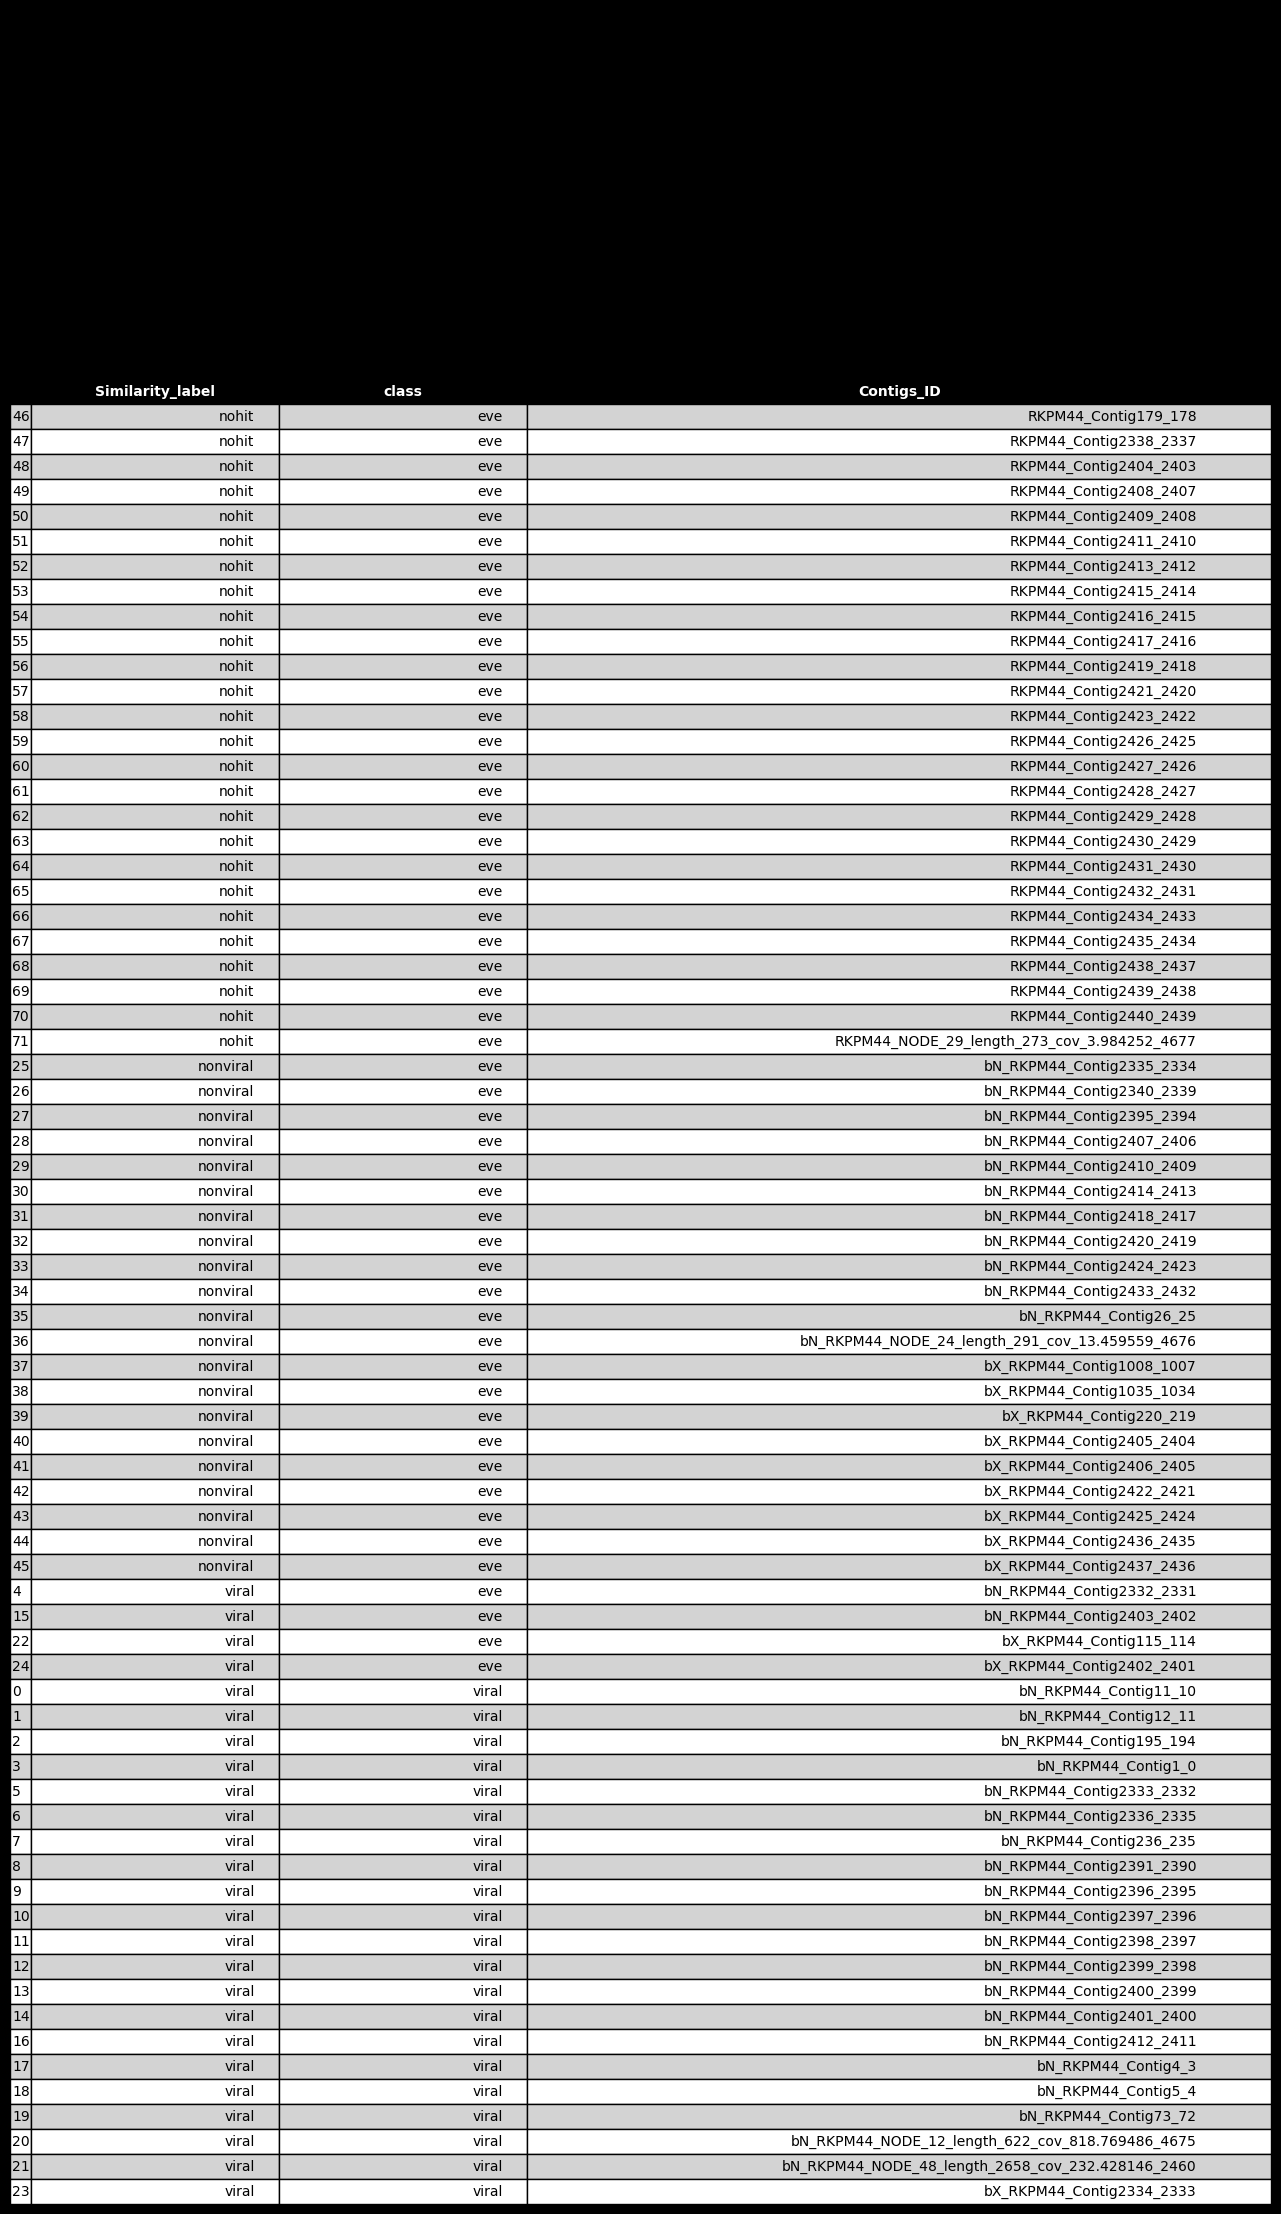

In [316]:


fig, ax = plt.subplots()
ax.axis('off')  # Hide axis

table = pd.plotting.table(ax, df_report)

table.auto_set_font_size(False)
table.scale(2, 1.5)

# Customize table design
for (row, col), cell in table.get_celld().items():
    
    # Header row
    if row == 0:
        cell.set_text_props(size=10, weight='bold', color='white')
        cell.set_facecolor('black')
    
    # Data rows
    else:
        cell.set_text_props(size=10, color='black')
        if row % 2:
            cell.set_facecolor('lightgray')
    
    # Contig ID column
    if col == 2:
        cell.set_width(1.5)
    # Other columns
    else:
        cell.set_width(.5)


path_table = f'{lib_id}-report.png'
# path_table = f'{path_root}/{path_table}'
# plt.savefig(path_table)
print(f'path_table: {path_table}')

plt.show()